# What do you random models look like

In [3]:
%matplotlib inline
from pylab import *
import fake_keras as f
import scipy.stats

input_dim = 10
output_dim = 1

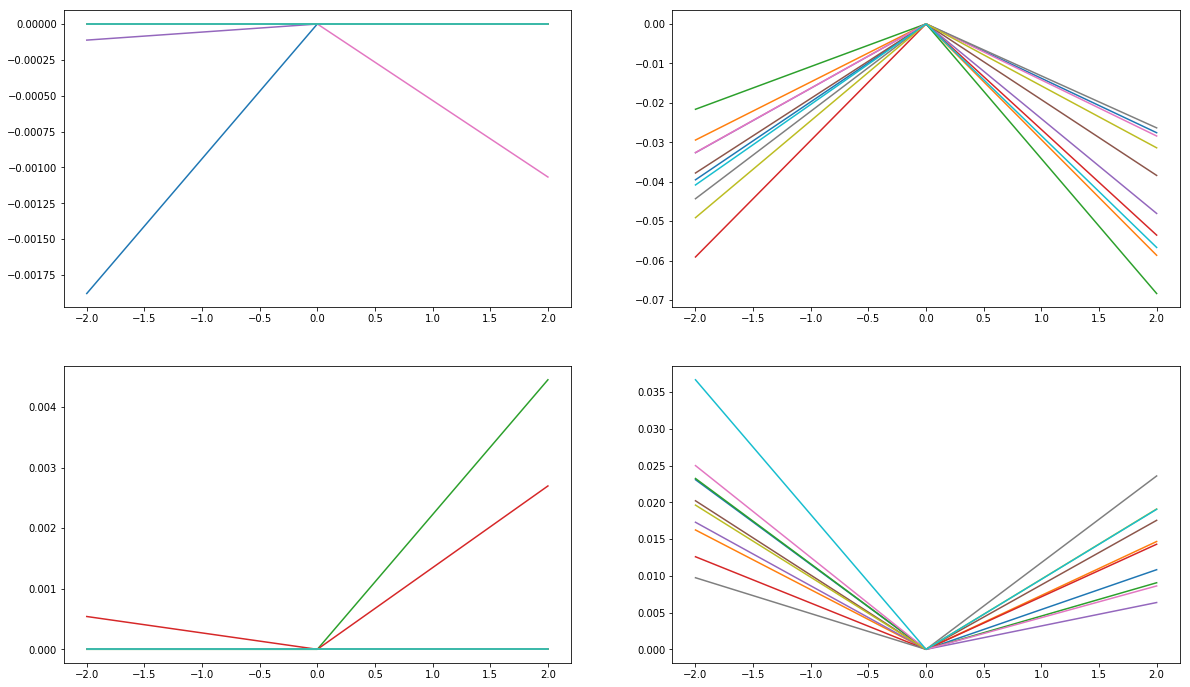

In [4]:
n_sqrt = 2
n_models = n_sqrt ** 2
figure(figsize=(20, 12))

for i in range(n_models):
    subplot(n_sqrt, n_sqrt, i+1)
    
    # single model across space in the different dimensions
    model = f.fixed_size_random_keras_network(input_dim,
                                              output_dim,
                                              dims=[64] * 8)
    n = 1000
    x = linspace(-2, 2, n).astype(np.float32)

    for i in range(input_dim):
        X = np.zeros((n, input_dim), dtype=np.float32)
        X[:,i] = x
        y = model.predict(X).squeeze()
        plot(x, y, '-')
        grid()    

# What does interpolating between *models* look like?

In [6]:
%%time
dims = [32] * 5
kwargs = dict(
    dims=dims
)
a = f.fixed_size_random_keras_network(input_dim, output_dim, **kwargs)
b  = f.fixed_size_random_keras_network(input_dim, output_dim, **kwargs)
dummy = f.fixed_size_random_keras_network(input_dim, output_dim, **kwargs)

CPU times: user 1.42 s, sys: 14.1 ms, total: 1.44 s
Wall time: 1.41 s


In [7]:
n = 100
theta = linspace(0, 1, n).astype(np.float32)
m = 5
X0 = np.random.randn(m, input_dim)

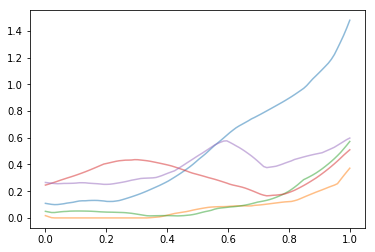

In [8]:
for x0 in X0:
    x0 = x0.reshape(1, input_dim)
    fa = a.predict(x0).squeeze()
    fb = b.predict(x0).squeeze()
    wa = a.get_weights()
    wb = b.get_weights()
    y = np.zeros_like(theta)
    for i, th in enumerate(theta):
        w = [x + th * y for (x, y) in zip(wa, wb)]
        dummy.set_weights(w)
        y[i] = dummy.predict(x0).squeeze()
    plot(theta, y, alpha=0.5)

# mnist for ref

In [12]:
import scipy.stats
def rand_weights(a):
    _ = a.predict(x_test)
    for i in range(len(a.layers)):
        if a.layers[i].name.startswith('dense'):
            w = a.layers[i].get_weights()
            w[0] = f.glorot_uniform_replace(w[0].shape) # weights
#             w[1] = scipy.stats.norm().rvs(w[1].shape) # bias
            a.layers[i].set_weights(w)
    return a

In [13]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model = rand_weights(model)

print(model.evaluate(x_test, y_test))
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)


10000/10000 [==============================] - 0s 27us/step
[2.3960363712310793, 0.0844]
Epoch 1/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.2028 - acc: 0.9398
Epoch 2/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.0825 - acc: 0.9745
Epoch 3/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.0515 - acc: 0.9840
Epoch 4/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0377 - acc: 0.9875
Epoch 5/5
10000/10000 [==============================] - 0s 23us/step


[0.07718643172045121, 0.978]

In [60]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 33us/step


[14.2298734664917, 0.1163]

In [18]:
def get_a_random_mnist_net():
    a = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation=tf.nn.relu),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    a.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    # trigger the layers to be populated
    _ = a.predict(x_test)
    a = rand_weights(a)
    return a

a = get_a_random_mnist_net()
b = get_a_random_mnist_net()
dummy = get_a_random_mnist_net()

In [19]:
a.evaluate(x_test, y_test), b.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 34us/step


([2.282295832824707, 0.1104], [2.3010052139282227, 0.1126])

In [20]:
fa = a.evaluate(x_test, y_test)
fb = b.evaluate(x_test, y_test)
wa = a.get_weights()
wb = b.get_weights()

n = 20
theta = linspace(0, 1, n).astype(np.float32)
loss = np.zeros_like(theta)
acc = np.zeros_like(theta)
for i, th in enumerate(theta):
    w = [x + th * y for (x, y) in zip(wa, wb)]
    dummy.set_weights(w)
    loss[i], acc[i] = dummy.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 23us/step


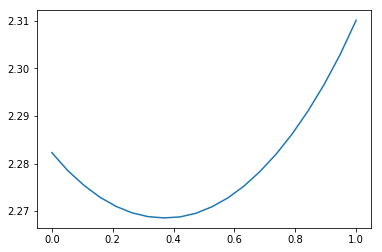

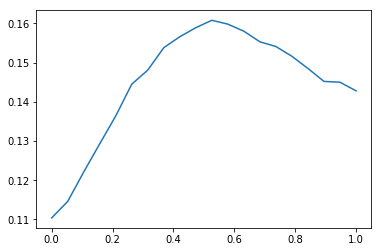

In [21]:
plot(theta, loss)
figure()
plot(theta, acc)

In [63]:
tf.keras.layers.Dense(12)
